## Лабораторна робота №5
### група МІТ-31
### Квартюк Олексій Борисович

Завантажте набір даних по медичному страхуванню за посиланням
За рахунок зміни гіперпараметрів нейронної мережі спробуйте досягнути найменшого значення функції втрат (mae).
Підготувати необхідні файли для захисту , за прикладом попередньої лабораторної роботи, але не викладати їх в репозиторій github до моменту захисту лабораторної роботи.
Викласти результати в репозиторій під час захисту лабораторної роботи.

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# import seaborn as sns
# import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [3]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_dummy = pd.get_dummies(insurance)
insurance_dummy.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
X = insurance_dummy.drop("charges", axis=1)
y = insurance_dummy["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
tf.random.set_seed(42)

# Create a new model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# compiling the model
insurance_model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(),metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
insurance_model.evaluate(X_test, y_test)
# epochs 100, sgd

9/9 [==============================] - 0s 1ms/step - loss: 7355.0122 - mae: 7355.0122


[7355.01220703125, 7355.01220703125]

In [ ]:
insurance_model.evaluate(X_test, y_test)
# epochs 500, sgd

9/9 [==============================] - 0s 1ms/step - loss: 4730.0425 - mae: 4730.0425


[4730.04248046875, 4730.04248046875]

In [12]:
insurance_model.evaluate(X_test, y_test)
# epochs 100, adam

9/9 [==============================] - 0s 3ms/step - loss: 11329.1406 - mae: 11329.1406


[11329.140625, 11329.140625]

In [14]:
insurance_model.evaluate(X_test, y_test)
# epochs 200, adam

9/9 [==============================] - 0s 3ms/step - loss: 8310.9102 - mae: 8310.9102


[8310.91015625, 8310.91015625]

In [ ]:
insurance_model.evaluate(X_test, y_test)
# epochs 500, adam

9/9 [==============================] - 0s 2ms/step - loss: 11191.2988 - mae: 11191.2988


[11191.298828125, 11191.298828125]

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(200, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# compiling the model
model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(), metrics = ['mae'])

# fit the model
model_history = model.fit(X_train, y_train, epochs = 200, verbose=0, validation_data=(X_test, y_test))

In [16]:
model.evaluate(X_test, y_test)
# epochs 200, adam

9/9 [==============================] - 0s 3ms/step - loss: 1780.2615 - mae: 1780.2615


[1780.261474609375, 1780.261474609375]

In [ ]:
model.evaluate(X_test, y_test)
# epochs 500, adam

9/9 [==============================] - 0s 1ms/step - loss: 1339.4487 - mae: 1339.4487


[1339.44873046875, 1339.44873046875]

In [ ]:
model.evaluate(X_test, y_test)
# epochs 1000, adam

9/9 [==============================] - 0s 1ms/step - loss: 1282.7518 - mae: 1282.7518


[1282.7518310546875, 1282.7518310546875]

In [ ]:
model.evaluate(X_test, y_test)
# epochs 500, Sgd

9/9 [==============================] - 0s 2ms/step - loss: 12934.3418 - mae: 12934.3418


[12934.341796875, 12934.341796875]

In [ ]:
model_8dense = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(200, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# compiling the model
model_8dense.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(), metrics = ['mae'])

# fit the model
model_8dense.fit(X_train, y_train, epochs = 500, verbose=0)

In [ ]:
model_8dense.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1328.7927 - mae: 1328.7927


[1328.792724609375, 1328.792724609375]

In [ ]:
model_3dense = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# compiling the model
model_3dense.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(), metrics = ['mae'])

# fit the model
model_3dense.fit(X_train, y_train, epochs = 500, verbose=0)

In [ ]:
model_3dense.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2812.0120 - mae: 2812.0120


[2812.011962890625, 2812.011962890625]

### Отже, ми побачили, що мінімальний mae(1282) можна побачити при 1000 епохах, компіляторі Адам та 300, 200, 50, 10, 1 dense шарами

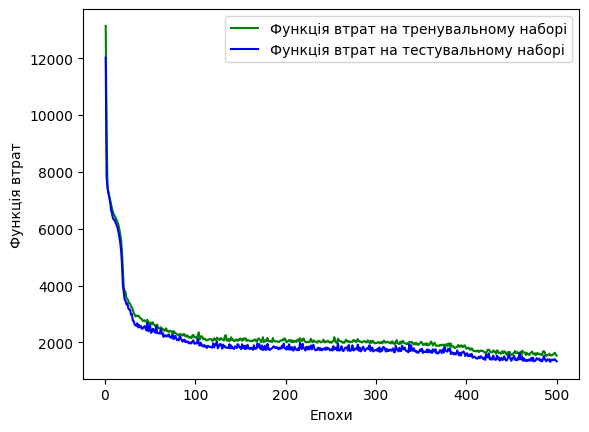

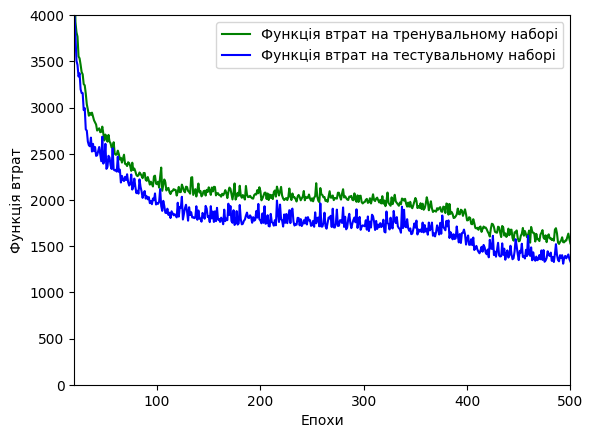

In [10]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'g', label='Функція втрат на тренувальному наборі')
plt.plot(epochs, val_loss, 'b', label='Функція втрат на тестувальному наборі')
plt.xlabel('Епохи')
plt.ylabel('Функція втрат')
plt.legend()
plt.show()

epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'g', label='Функція втрат на тренувальному наборі')
plt.plot(epochs, val_loss, 'b', label='Функція втрат на тестувальному наборі')
plt.xlabel('Епохи')
plt.ylabel('Функція втрат')
plt.legend()
plt.xlim(20, 500)
plt.ylim(0, 4000)
plt.show()